In [1]:
import numpy
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
data = Path("D://insat_data_bah2025//Order//Jul25_133821")
data.exists()

True

In [3]:
len(list(data.glob('*.h5')))

1511

In [6]:
data = list(data.glob('*.h5'))
data[0]

WindowsPath('D:/insat_data_bah2025/Order/Jul25_133821/3RIMG_01JUL2025_0015_L1C_ASIA_MER_V01R00.h5')

In [4]:
import h5py

In [7]:
with h5py.File(data[0], 'r')as f:
    print(list(f.keys()))

['GreyCount', 'IMG_MIR', 'IMG_MIR_RADIANCE', 'IMG_MIR_TEMP', 'IMG_SWIR', 'IMG_SWIR_RADIANCE', 'IMG_TIR1', 'IMG_TIR1_RADIANCE', 'IMG_TIR1_TEMP', 'IMG_TIR2', 'IMG_TIR2_RADIANCE', 'IMG_TIR2_TEMP', 'IMG_VIS', 'IMG_VIS_ALBEDO', 'IMG_VIS_RADIANCE', 'IMG_WV', 'IMG_WV_RADIANCE', 'IMG_WV_TEMP', 'Projection_Information', 'Sat_Azimuth', 'Sat_Elevation', 'Sun_Azimuth', 'Sun_Elevation', 'X', 'Y', 'proj_dim', 'time']


In [7]:
f = h5py.File(data[0])

In [8]:
f.keys()

<KeysViewHDF5 ['GreyCount', 'IMG_MIR', 'IMG_MIR_RADIANCE', 'IMG_MIR_TEMP', 'IMG_SWIR', 'IMG_SWIR_RADIANCE', 'IMG_TIR1', 'IMG_TIR1_RADIANCE', 'IMG_TIR1_TEMP', 'IMG_TIR2', 'IMG_TIR2_RADIANCE', 'IMG_TIR2_TEMP', 'IMG_VIS', 'IMG_VIS_ALBEDO', 'IMG_VIS_RADIANCE', 'IMG_WV', 'IMG_WV_RADIANCE', 'IMG_WV_TEMP', 'Projection_Information', 'Sat_Azimuth', 'Sat_Elevation', 'Sun_Azimuth', 'Sun_Elevation', 'X', 'Y', 'proj_dim', 'time']>

In [9]:
img_tir_uncab = f['IMG_TIR1_TEMP'][:]

In [10]:
img_tir_uncab.shape

(1024,)

In [8]:
plt.imshow(img_tir_uncab.squeeze(), cmap='Spectral_r')
plt.colorbar(label='Reflectance (Albedo)')
plt.title("Visible Albedo")
plt.show()

NameError: name 'img_tir_uncab' is not defined

In [ ]:
f['IMG_TIR1_TEMP'][:]

array([340.05972, 340.05972, 340.05972, ..., 179.85948, 179.85948,
       179.85948], shape=(1024,), dtype=float32)

In [ ]:
f['IMG_TIR1'][:]

1.766998


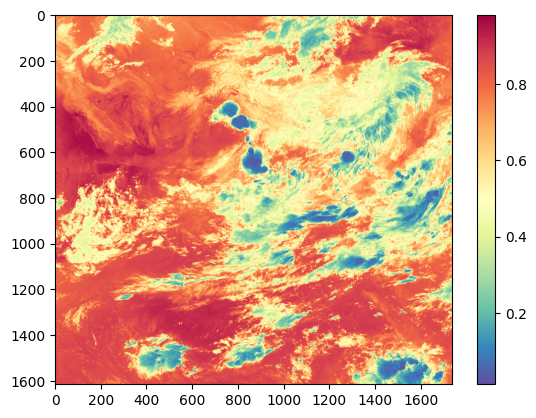

In [ ]:
tir_1_d = f['IMG_TIR1'][:]
tir_1_d = tir_1_d.squeeze()

# Lookup table
tir_1_lut = f['IMG_TIR1_RADIANCE'][:]
print(tir_1_lut[0])

# Conv DN -> LUT
tir_1_d_corr = tir_1_lut[tir_1_d]
plt.imshow(tir_1_d_corr,cmap = "Spectral_r")
plt.colorbar()
plt.show()

In [ ]:
with h5py.File(data[0], 'r')as f:
    print(list(f.keys()))

[WindowsPath('D:/insat_data_bah2025/Order/Jul25_133821/3RIMG_01JUL2025_0015_L1C_ASIA_MER_V01R00.h5'),
 WindowsPath('D:/insat_data_bah2025/Order/Jul25_133821/3RIMG_01JUL2025_0045_L1C_ASIA_MER_V01R00.h5'),
 WindowsPath('D:/insat_data_bah2025/Order/Jul25_133821/3RIMG_01JUL2025_0115_L1C_ASIA_MER_V01R00.h5'),
 WindowsPath('D:/insat_data_bah2025/Order/Jul25_133821/3RIMG_01JUL2025_0145_L1C_ASIA_MER_V01R00.h5')]

In [33]:
# Sanity Check
for i in data:
    with h5py.File(i,'r') as f:
        tir1 = f['IMG_TIR1'][:]
        tir1 = tir1.squeeze()
        tir1_lut = f['IMG_TIR1_TEMP'][:]
        tir_1_cal = tir1_lut[tir1]
    break

In [34]:
tir_1_cal.shape

(1616, 1737)

In [35]:
# Satellite Spatial Resolution ~ 4km
spectral_height = 1616 # --> 512 ||| 1616 * 4km = 6464 km height coverage
spectral_width = 1737 # --> 512 ||| 1737 * 4km = 6968 km wide coverage

# Downsampling To Spatial Resolution 10km


In [26]:
import numpy as np

original_shape = (1616, 1737)
scale = 4 / 10  # ≈ 0.4
target_shape = tuple(np.round(scale * np.array(original_shape)).astype(int))  # (646, 695)

In [38]:
tir_1_cal.min()

np.float32(179.85948)

In [39]:
tir_1_cal

array([[266.08545, 265.87497, 267.12857, ..., 288.62576, 288.47162,
        288.16238],
       [265.87497, 265.2396 , 266.92117, ..., 288.93307, 288.62576,
        288.31717],
       [265.87497, 265.2396 , 266.50458, ..., 288.93307, 288.62576,
        288.31717],
       ...,
       [293.54102, 293.39673, 293.39673, ..., 286.43808, 286.75458,
        286.2793 ],
       [293.685  , 293.54102, 293.25217, ..., 282.6974 , 284.51007,
        285.64084],
       [293.39673, 293.25217, 293.10736, ..., 280.83896, 281.35046,
        283.85605]], shape=(1616, 1737), dtype=float32)

In [50]:
Path('Root').mkdir(parents=True,exist_ok=True)

In [53]:
def create_dataset(path : Path, save_dir : Path, save_name : str):
    """
    Extracts TIR1 channel and stores it in the save dir, no preprocessing
    """
    assert path.exists(), "Invalid path entered"
    with h5py.File(path,'r') as f:
        tir1 = f['IMG_TIR1'][:]
        tir1 = tir1.squeeze()
        
        calibrator = f['IMG_TIR1_TEMP'][:]
        tir1_calibrated = calibrator[tir1]
        
        
        save_dir.mkdir(parents = True,exist_ok = True) 
        
        save_path = save_dir / f"{save_name}.npy"
        np.save(save_path, tir1_calibrated)

In [54]:
path = data[0]
create_dataset(path,Path('datata'),'test')

In [28]:
import torch
import torch.nn.functional as F

# Convert to tensor and add batch & channel dims: (1, 1, H, W)
tir1_tensor = torch.tensor(tir1, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Interpolate
tir1_ds_tensor = F.interpolate(tir1_tensor, size=target_shape, mode='bilinear', align_corners=False)

# Remove batch & channel dims back to (H, W)
tir1_ds = tir1_ds_tensor.squeeze(0).squeeze(0).numpy()


In [30]:
tir1_ds.shape

(646, 695)

In [55]:
np.load('datata/test.npy')

array([[266.08545, 265.87497, 267.12857, ..., 288.62576, 288.47162,
        288.16238],
       [265.87497, 265.2396 , 266.92117, ..., 288.93307, 288.62576,
        288.31717],
       [265.87497, 265.2396 , 266.50458, ..., 288.93307, 288.62576,
        288.31717],
       ...,
       [293.54102, 293.39673, 293.39673, ..., 286.43808, 286.75458,
        286.2793 ],
       [293.685  , 293.54102, 293.25217, ..., 282.6974 , 284.51007,
        285.64084],
       [293.39673, 293.25217, 293.10736, ..., 280.83896, 281.35046,
        283.85605]], shape=(1616, 1737), dtype=float32)

In [27]:
target_shape

(np.int64(646), np.int64(695))

In [8]:
# Load temperature data
temp_data = f['IMG_TIR1_TEMP'][:]

# Basic validation
print(f"Temp range: {temp_data.min():.2f} to {temp_data.max():.2f}")

# Normalize for neural network
temp_normalized = (temp_data - temp_data.mean()) / temp_data.std()

Temp range: 179.86 to 340.06


In [9]:
temp_normalized

array([ 1.1021392,  1.1021392,  1.1021392, ..., -2.0135677, -2.0135677,
       -2.0135677], shape=(1024,), dtype=float32)

In [10]:
import preprocessor
preprocessor.basic_preprocessor(data[0])

SyntaxError: invalid syntax (preprocessor.py, line 20)

In [14]:

f = h5py.File(data[0]) # Get the file
channel_TIR1 = f['IMG_TIR1'][:]  # Only get the TIR1 to get proof of concept

channel_TIR1_temp = f['IMG_TIR1_TEMP'][:] # Get lookup table
channel_TIR1_cal = channel_TIR1_temp[channel_TIR1.squeeze()]



In [10]:
import preprocessor
preprocessor.basic_preprocessor(data[0])

array([[266.08545, 265.87497, 267.12857, ..., 288.62576, 288.47162,
        288.16238],
       [265.87497, 265.2396 , 266.92117, ..., 288.93307, 288.62576,
        288.31717],
       [265.87497, 265.2396 , 266.50458, ..., 288.93307, 288.62576,
        288.31717],
       ...,
       [293.54102, 293.39673, 293.39673, ..., 286.43808, 286.75458,
        286.2793 ],
       [293.685  , 293.54102, 293.25217, ..., 282.6974 , 284.51007,
        285.64084],
       [293.39673, 293.25217, 293.10736, ..., 280.83896, 281.35046,
        283.85605]], shape=(1616, 1737), dtype=float32)

In [15]:
temp_data = channel_TIR1_cal

In [11]:
import numpy as np

# Your current data shape: (1, 1616, 1737)
# Factor 4 downsampling

factor = 4

# Method 1: Reshape and average (block averaging)
temp_downsampled = temp_data.reshape(
                                   1616//factor, factor,
                                   1737//factor, factor).mean(axis=(2, 4))

# Result shape: (1, 404, 434)
print(f"New shape: {temp_downsampled.shape}")
print(f"New resolution: {4 * factor}km = 16km")

ValueError: cannot reshape array of size 1024 into shape (404,4,434,4)

In [15]:
channel_TIR1_cal.shape

(1616, 1737)

In [16]:
# Current shape: (1616, 1737)
factor = 4

# Downsample by factor of 4
temp_downsampled = channel_TIR1_cal.reshape(1616//factor, factor,
                                          1737//factor, factor).mean(axis=(1, 3))

print(f"Downsampled shape: {temp_downsampled.shape}")  # Should be (404, 434)
print(f"Temperature range: {temp_downsampled.min():.2f} to {temp_downsampled.max():.2f}")

ValueError: cannot reshape array of size 2806992 into shape (404,4,434,4)

In [17]:
print(f"1616 ÷ 4 = {1616//4} remainder {1616%4}")
print(f"1737 ÷ 4 = {1737//4} remainder {1737%4}")
print(f"Total pixels: {1616 * 1737}")

1616 ÷ 4 = 404 remainder 0
1737 ÷ 4 = 434 remainder 1
Total pixels: 2806992


In [18]:
# Crop to make dimensions divisible by 4
factor = 4
new_h = (1616 // factor) * factor  # 1616 (already divisible)
new_w = (1737 // factor) * factor  # 1736 (removes 1 pixel)

print(f"Cropping from {channel_TIR1_cal.shape} to ({new_h}, {new_w})")

# Crop the data (remove 1 pixel from width)
channel_TIR1_cropped = channel_TIR1_cal[:new_h, :new_w]  # Shape: (1616, 1736)

# Now downsample
temp_downsampled = channel_TIR1_cropped.reshape(new_h//factor, factor,
                                              new_w//factor, factor).mean(axis=(1, 3))

print(f"Downsampled shape: {temp_downsampled.shape}")  # Should be (404, 434)

Cropping from (1616, 1737) to (1616, 1736)
Downsampled shape: (404, 434)


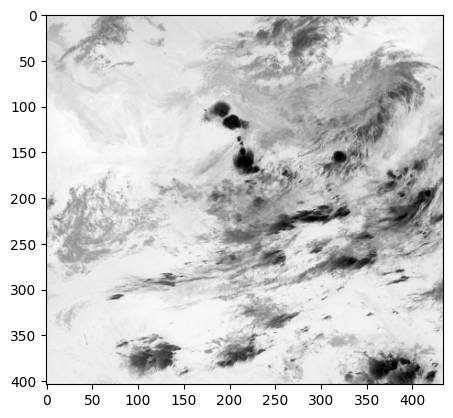

In [21]:
plt.imshow(temp_downsampled,cmap='grey')

In [22]:
from pathlib import Path
import h5py
import numpy as np

def basic_preprocessor(path_to_h5, factor=4):
    """
    Extracts IMG_TIR1 from HDF5, calibrates to temperature, downsamples from 4km to 10km.
    Returns a 2D numpy array [H', W'] at 10km resolution.
    """
    path_to_h5 = Path(path_to_h5)
    assert path_to_h5.exists(), f"Invalid path: {path_to_h5}"

    with h5py.File(path_to_h5, 'r') as f:
        raw_dn = f['IMG_TIR1'][:]            # shape [H, W]
        temp_lut = f['IMG_TIR1_TEMP'][:]     # shape [LUT_size]

    # Safety: clip raw indices
    raw_dn_clipped = np.clip(raw_dn, 0, len(temp_lut) - 1)
    bt_calibrated = temp_lut[raw_dn_clipped]  # calibrated BT [H, W]

    # Crop to make divisible by downsampling factor
    H, W = bt_calibrated.shape
    new_H = (H // factor) * factor
    new_W = (W // factor) * factor
    bt_cropped = bt_calibrated[:new_H, :new_W]

    # Downsample by reshaping and averaging
    bt_downsampled = bt_cropped.reshape(
        new_H // factor, factor,
        new_W // factor, factor
    ).mean(axis=(1, 3))  # result shape: [H', W']

    return bt_downsampled


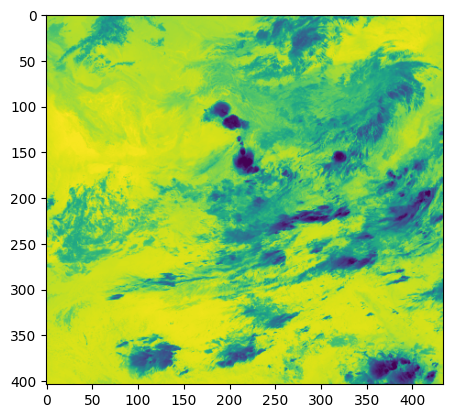

In [27]:
from preprocessor import basic_preprocessor
plt.imshow(basic_preprocessor(data[0]))

1.766998


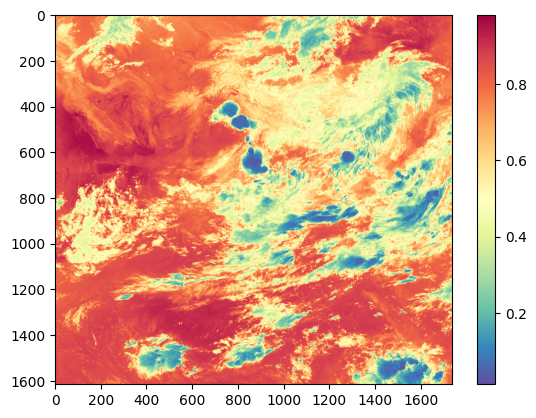

In [28]:
tir_1_d = f['IMG_TIR1'][:]
tir_1_d = tir_1_d.squeeze()

# Lookup table
tir_1_lut = f['IMG_TIR1_RADIANCE'][:]
print(tir_1_lut[0])

# Conv DN -> LUT
tir_1_d_corr = tir_1_lut[tir_1_d]
plt.imshow(tir_1_d_corr,cmap = "Spectral_r")
plt.colorbar()
plt.show()

In [10]:
from preprocessor import basic_preprocessor
basic_preprocessor(data[0],'Data','1')

In [13]:
from pathlib import Path
from typing import Optional
import h5py
import numpy as np

def basic_p(
    path_to_h5: Path,
    save_dir: Path,
    save_name: str,
    factor: int = 4,
    original_height: int = 1616,
    original_width: int = 1737
) -> None:
    """
    Extracts the TIR1 channel, performs calibrations, and downsamples to lower resolution.
    
    Args:
        path_to_h5: Path to input HDF5 file
        save_dir: Directory to save output
        save_name: Base name for output file (without extension)
        factor: Downsampling factor (default 4, from 4km to 10km)
        original_height: Original image height in pixels
        original_width: Original image width in pixels
        
    Raises:
        FileNotFoundError: If input file doesn't exist
        ValueError: If dimensions aren't divisible by factor
    """
    if not path_to_h5.exists():
        raise FileNotFoundError(f"Input file not found: {path_to_h5}")
        
    # Validate downsampling factor
    if original_height % factor != 0 or original_width % factor != 0:
        raise ValueError("Original dimensions must be divisible by factor")
    
    with h5py.File(path_to_h5, 'r') as f:
        # Extract and calibrate TIR1 channel
        channel_TIR1 = f['IMG_TIR1'][:]
        channel_TIR1_temp = f['IMG_TIR1_TEMP'][:]
        channel_TIR1_cal = channel_TIR1_temp[channel_TIR1.squeeze()]
        
        # Calculate new dimensions
        new_h = original_height // factor
        new_w = original_width // factor
        
        # Crop and downsample
        channel_TIR1_cropped = channel_TIR1_cal[:original_height, :original_width]
        temp_downsampled = channel_TIR1_cropped.reshape(
            new_h, factor, new_w, factor
        ).mean(axis=(1, 3))
    
    # Save results
    save_path = save_dir / f"{save_name}.npy"
    np.save(save_path, temp_downsampled)

In [14]:
basic_p(data[0],Path('Data'),'1')

ValueError: Original dimensions must be divisible by factor

In [ ]:
count = 8
str(count)

'8'

: 